In [4]:
import cv2
import sys
import os

import matplotlib.pyplot as plt
from IPython.display import HTML
import urllib

In [5]:
videoName = 'race_car.mp4'

In [6]:
if not os.path.isfile('goturn.prototxt') or not os.path.isfile('goturn.caffemodel'):
    urllib.request.urlretrieve('https://www.dropbox.com/sh/77frbrkmf9ojfm6/AACgY7-wSfj-LIyYcOgUSZ0Ua?dl=0', 'GOTURN.zip')

In [7]:
!tar -xvf GOTURN.zip
os.remove('GOTURN.zip')

tar: Error opening archive: Unrecognized archive format


In [ ]:
trackerTypes = ['BOOSTING', 'MIL', 'KCF', 'MEDIANFLOW', 'GOTURN']
trackerType = trackerTypes[4]

if trackerType == 'BOOSTING':
    tracker = cv2.legacy_TrackerBoosting.create()
elif trackerType == "MIL":
    tracker = cv2.TracerMIL_create()
elif trackerType == 'KCF':
    tracker = cv2.TrackerKCF_create()
elif trackerType == "MEDIANFLOW":
    tracker = cv2.legacy_TrackerMedianFlow.create()
elif trackerType == "GOTURN":
    tracker = cv2.TrackerGOTURN_create()

error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\dnn\src\caffe\caffe_io.cpp:1126: error: (-2:Unspecified error) FAILED: fs.is_open(). Can't open "goturn.prototxt" in function 'cv::dnn::ReadProtoFromTextFile'


: 

In [ ]:
video = cv2.VideoCapture(videoName)
ok, frame = video.read()

if not ok or not video.isOpened():
    print('Error')
    sys.exit()
else:
    w = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
    h = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))

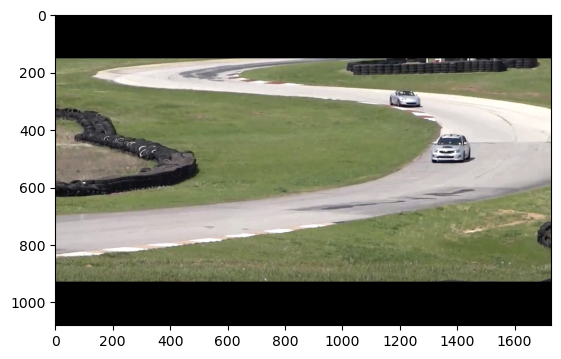

In [ ]:
imgCar = cv2.imread('race_car.png', 1)[:,:,::-1]
plt.imshow(imgCar)

In [ ]:
bbox = 1300, 400, 150, 130

In [ ]:
def drawRectangle(frame, bbox):
    p1 = (int(bbox[0]), int(bbox[1]))
    p2 = (int(bbox[0] + bbox[2]), int(bbox[1] + bbox[3]))
    cv2.rectangle(frame, p1, p2, (0, 0, 255), 2, 1)

In [ ]:
def displayRectangle(frame, bbox):
    plt.figure(figsize=[20, 10])
    frameCopy = frame.copy()
    drawRectangle(frameCopy, bbox)
    plt.imshow(frameCopy)

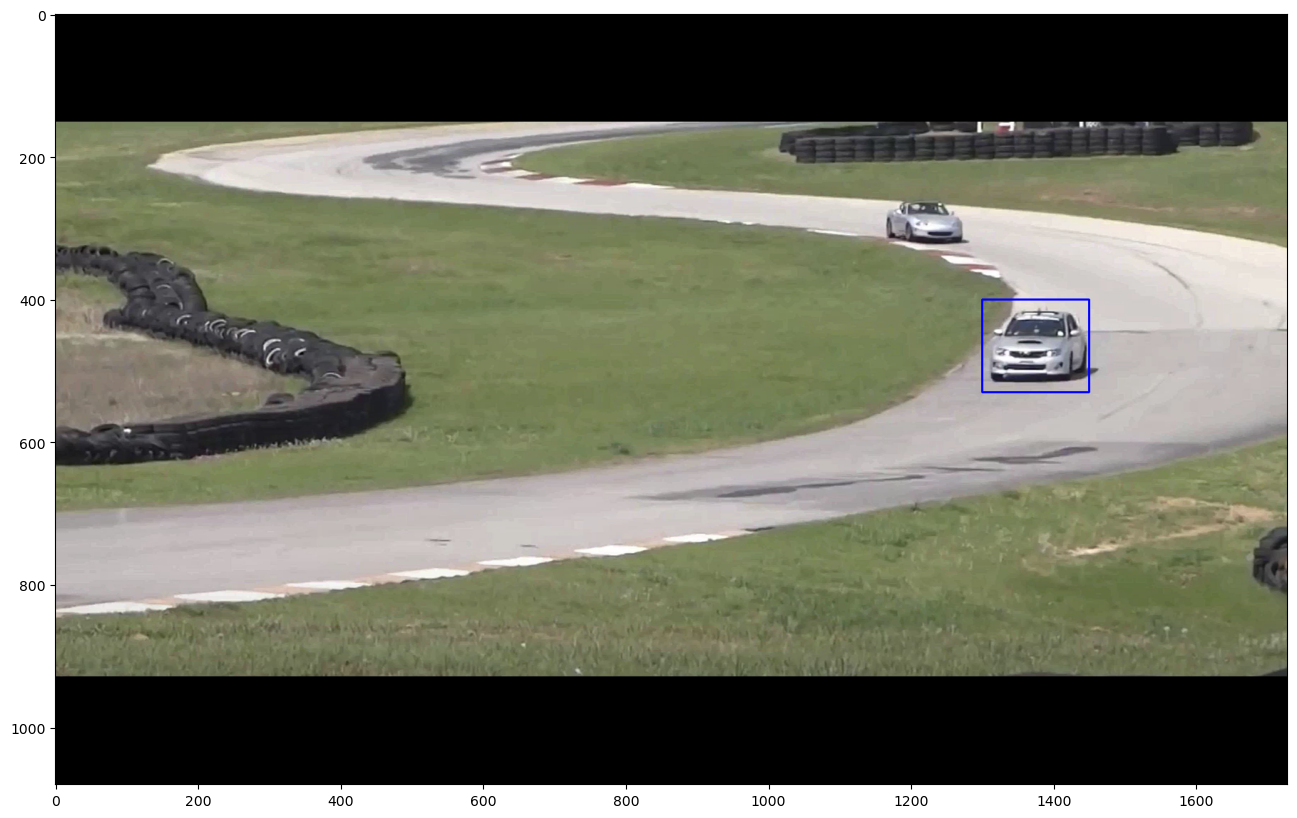

In [ ]:
displayRectangle(frame[:,:,::-1], bbox)

In [ ]:
ok = tracker.init(frame, bbox)
videoResName = 'out'+trackerType+videoName


videoRes = cv2.VideoWriter(videoResName, cv2.VideoWriter_fourcc(*'avc1'), fps=10, frameSize=(w, h))
while True:
    ok, frame = video.read()
    if not ok:
        break

    ok, bbox = tracker.update(frame)
    if ok:
        drawRectangle(frame, bbox)
    videoRes.write(frame[:,:,::-1])

video.release()
videoRes.release()